In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [150]:
df = pd.read_csv('news_10_category_sa.csv')

In [188]:
features = df.columns.drop(['text', 'category', 'sa'])
features

Index([], dtype='object')

In [151]:
df.describe()

,sa
count,101200.000000
mean,0.157298
std,0.561016
min,-0.991700
25%,-0.296000
50%,0.226300
75%,0.659700
max,0.995500


In [152]:
df.head()

,category,text,sa
0,ENTERTAINMENT,23 funniest tweet cat dog week sept 1723 dog d...,0.5574
1,PARENTING,funniest tweet parent week sept 1723 accidenta...,0.3400
2,WORLD NEWS,puerto ricans desperate water hurricane fionas...,-0.3182
3,WORLD NEWS,biden un call russian war affront body charter...,-0.9493
4,WORLD NEWS,world cup captain want wear rainbow armband qa...,0.2732


In [153]:
# Randomly select 20000 row indices from the part of the DataFrame where category == "POLITICS"
to_keep = df.sample(2000, random_state=42).index

In [154]:
# Drop these rows
df = df[df.index.isin(to_keep)]
df.describe()

,sa
count,2000.000000
mean,0.174466
std,0.552017
min,-0.967400
25%,-0.250000
50%,0.285600
75%,0.659700
max,0.980500


In [155]:
df['category'].value_counts()

POLITICS               284
WELLNESS               265
GROUPS VOICES          217
PARENTING              212
STYLE & BEAUTY         195
ENTERTAINMENT          186
WORLD NEWS             173
TRAVEL                 168
BUSINESS & FINANCES    157
FOOD & DRINK           143
Name: category, dtype: int64

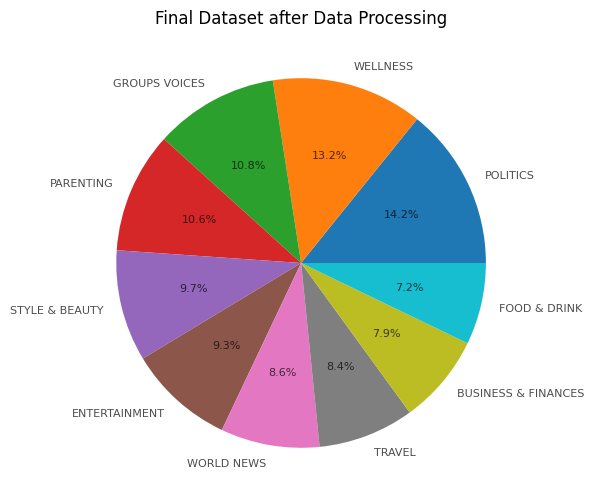

In [156]:
plt.figure(figsize=(12, 6))
plt.pie(x=df.category.value_counts(), labels=df.category.value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 8, 'alpha':.7})
plt.title('Final Dataset after Data Processing')
plt.show()

In [157]:
# save the data
df.to_csv('./news_10_category_sa_2k.csv', index=False)

In [158]:
import pandas as pd
df = pd.read_csv('./news_10_category_sa_2k.csv')

In [159]:
df[df.duplicated()]

,category,text,sa


In [160]:
df.head()

,category,text,sa
0,WORLD NEWS,least 32 dead fire karaoke parlor south vietna...,-0.9100
1,ENTERTAINMENT,steve martin say murder building could final r...,-0.4767
2,POLITICS,texas sue biden administration right deny life...,-0.5719
3,WORLD NEWS,one gored first pamplona running bull 3 year a...,0.4939
4,GROUPS VOICES,diddy honored lifetime achievement starstudded...,0.8885


### Sample a Small Dataset with 6k records

In [175]:
df = pd.read_csv('./news_10_category_sa.csv')

In [180]:
len(df)

101200

In [176]:
def get_max_length(df):
    length_list = []
    for index, row in df.iterrows():
        length_list.append(len(row['text'].split(' ')))
    return length_list, np.percentile(length_list, 99)

99th Percentile of Text Lengths: 37.0


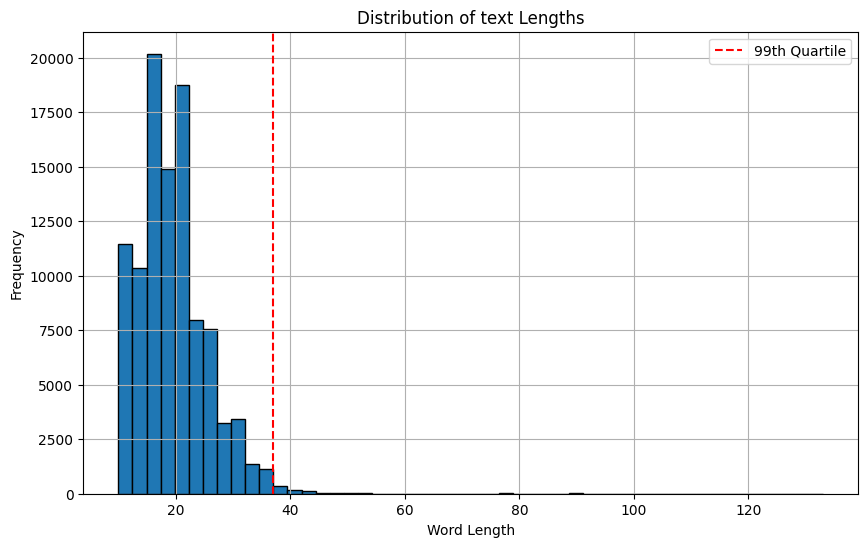

In [177]:
# Plotting the histogram
import matplotlib.pyplot as plt
length_list, percentile_99 = get_max_length(df)
plt.figure(figsize=(10, 6))
plt.hist(length_list, bins=50, edgecolor='black')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of text Lengths')

# Find the 98th percentile
# Adding a vertical line for the 98th quartile
print(f"99th Percentile of Text Lengths: {percentile_99}")
plt.axvline(x=percentile_99, color='red', linestyle='--', label='99th Quartile')
plt.legend()

plt.grid(True)
plt.show()

In [178]:
MAX_LEN = int(percentile_99)
MAX_LEN

37

In [185]:
len(df)

101200

In [186]:
to_keep = df.sample(n=6000, random_state=42).index
df_sample = df[df.index.isin(to_keep)]
df_sample.describe()
df_sample.to_csv('./news_10_category_sa_6k.csv', index=False)

In [183]:
len(df_sample)

30000

In [3]:
import pickle
def save_data(name, data):
    with open(name, 'wb') as f:
        pickle.dump(data, f)
        f.close()
def load_data(name):
    return pickle.load(open(name, 'rb'))

In [36]:
save_data('X_3k.h5', df['text'])
save_data('y_3k.h5', df['category'])

In [37]:
# load the data
X = load_data('X_3k.h5')
y = load_data('y_3k.h5')
print(f'X shape: {X.shape} \n y shape: {y.shape}')

X shape: (3000,) 
 y shape: (3000,)


In [38]:
# one-hot encoding y 
import numpy as np
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y_ohe = encoder.fit_transform(np.array(y).reshape(-1, 1))
print(y_ohe.shape)

(3000, 10)


In [39]:
#
y_ohe[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [40]:
import pandas as pd
y_df = pd.DataFrame(y)
y_ohe = pd.get_dummies(y_df)
class_names = y_ohe.columns.tolist()
y_df.head()


,category
0,PARENTING
1,TRAVEL
2,BUSINESS & FINANCES
3,POLITICS
4,GROUPS VOICES


In [41]:
y_ohe.head()

,category_BUSINESS & FINANCES,category_ENTERTAINMENT,category_FOOD & DRINK,category_GROUPS VOICES,category_PARENTING,category_POLITICS,category_STYLE & BEAUTY,category_TRAVEL,category_WELLNESS,category_WORLD NEWS
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0


##### Split Train and Test

In [42]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size=0.8, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

### DistilBertTokenizer + Dropout(.5)

In [43]:
from transformers import DistilBertTokenizer, DistilBertModel

In [44]:
bert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
save_data('bert_tokenizer.pickle', bert_tokenizer)

In [45]:
def process_tokenizer(tokenizer, text, max_len):
    """
    To unify the length of all tokenized text to max_len, which ensures all inputs have the same length.
    """
    input_ids = []
    attention_masks = []

    encoded_dict = tokenizer.batch_encode_plus(
                        text,
                        max_length = max_len,          
                        pad_to_max_length = True,
                        return_token_type_ids = False
                    )
        
    return np.array(encoded_dict['input_ids'])

In [46]:
X_train_padded = process_tokenizer(bert_tokenizer, X_train, MAX_LEN)
X_val_padded = process_tokenizer(bert_tokenizer, X_val, MAX_LEN)
X_test_padded = process_tokenizer(bert_tokenizer, X_test, MAX_LEN)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [47]:
X_train_padded[0]

array([  101,  2157,  2126,  2729, 14329,  2551,  2524, 18478, 14329,
       11266, 14083, 18981, 15689, 11834,  3064,  2984,  9388, 27663,
       15929,  7585,  2055,  9006,  2015,  5009, 14533,  5955,  4363,
       19002,  3554,  4338,   102,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0])

In [49]:
save_data('./data_3k/bert_X_train_padded.pickle', X_train_padded)
save_data('./data_3k/bert_X_val_padded.pickle', X_val_padded)
save_data('./data_3k/bert_X_test_padded.pickle', X_test_padded)
save_data('./data_3k/bert_y_train.pickle', y_train)
save_data('./data_3k/bert_y_val.pickle', y_val)
save_data('./data_3k/bert_y_test.pickle', y_test)

In [50]:
X_train_padded.shape, X_val_padded.shape, X_test_padded.shape

((600, 42), (1200, 42), (1200, 42))

##### DistilBertModel

In [51]:
from transformers import DistilBertModel, TFAutoModel, TFDistilBertModel, DistilBertConfig

In [52]:
pre_model = TFAutoModel.from_pretrained('distilbert-base-uncased')
# config distilbert initialization
#config = DistilBertConfig(dropout=0.2, attention_dropout=0.2)
#pre_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_projector', 'activation_13', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [53]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from transformers import AdamWeightDecay
from tensorflow_addons.metrics import F1Score

/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [54]:
label_num = y_ohe.shape[1]
input_layer = Input(shape=(MAX_LEN,), dtype=tf.int32)
transformer_layer = pre_model(input_layer)[0]
CLS = transformer_layer[:, 0, :]
dropout_1 = Dropout(0.8)(CLS)
output = Dense(label_num, activation='softmax')(dropout_1)
bert_tf = tf.keras.Model(inputs=input_layer, outputs=output)
bert_tf.compile(loss='categorical_crossentropy', 
                optimizer=AdamWeightDecay(learning_rate=2e-5, weight_decay_rate=0.01), 
                metrics=F1Score(num_classes=label_num, average='macro')
)
bert_tf.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 42)]              0         
                                                                 
 tf_distil_bert_model (TFDis  TFBaseModelOutput(last_h  66362880 
 tilBertModel)               idden_state=(None, 42, 7            
                             68),                                
                              hidden_states=None, att            
                             entions=None)                       
                                                                 
 tf.__operators__.getitem (S  (None, 768)              0         
 licingOpLambda)                                          

##### Train the model

In [55]:
y_train

,category_BUSINESS & FINANCES,category_ENTERTAINMENT,category_FOOD & DRINK,category_GROUPS VOICES,category_PARENTING,category_POLITICS,category_STYLE & BEAUTY,category_TRAVEL,category_WELLNESS,category_WORLD NEWS
133,0,0,0,0,0,0,1,0,0,0
1140,0,1,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,1,0
928,0,0,0,0,0,1,0,0,0,0
823,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1638,0,0,0,0,0,0,0,0,0,1
1095,0,0,0,0,0,1,0,0,0,0
1130,0,0,0,1,0,0,0,0,0,0
1294,0,0,0,0,1,0,0,0,0,0


In [56]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
EPOCHS = 10
BATCH_SIZE = 128
STEP_PER_EPOCH = len(X_train_padded) // BATCH_SIZE # number of batches in one epoch
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('./model/bert_weights.h5', monitor='val_f1_score', save_best_only=True)
lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 2)

history = bert_tf.fit(X_train_padded, y_train,
                    validation_data=(X_val_padded, y_val),
                    epochs=EPOCHS,
                    steps_per_epoch=STEP_PER_EPOCH,
                    callbacks=[early_stopping, model_checkpoint, lr])


Epoch 1/10


2023-10-11 11:23:28.119759: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4/4 [==============================] - 42s 11s/step - loss: 2.7039 - f1_score: 0.1061 - val_loss: 2.2616 - val_f1_score: 0.0805 - lr: 2.0000e-05
Epoch 2/10
4/4 [==============================] - 37s 11s/step - loss: 2.5162 - f1_score: 0.1212 - val_loss: 2.2575 - val_f1_score: 0.0601 - lr: 2.0000e-05
Epoch 3/10
4/4 [==============================] - 36s 10s/step - loss: 2.4647 - f1_score: 0.1025 - val_loss: 2.2538 - val_f1_score: 0.0921 - lr: 2.0000e-05
Epoch 4/10
4/4 [==============================] - 37s 10s/step - loss: 2.4851 - f1_score: 0.0895 - val_loss: 2.2392 - val_f1_score: 0.0980 - lr: 2.0000e-05
Epoch 5/10
4/4 [==============================] - 37s 10s/step - loss: 2.4122 - f1_score: 0.1251 - val_loss: 2.2193 - val_f1_score: 0.1290 - lr: 2.0000e-05
Epoch 6/10
4/4 [==============================] - 37s 11s/step - loss: 2.3963 - f1_score: 0.1471 - val_loss: 2.1915 - val_f1_score: 0.1601 - lr: 2.0000e-05
Epoch 7/10
4/4 [==============================] - 34s 10s/step - loss: 2.37

##### Comparing Model Metrics using the History Attribute

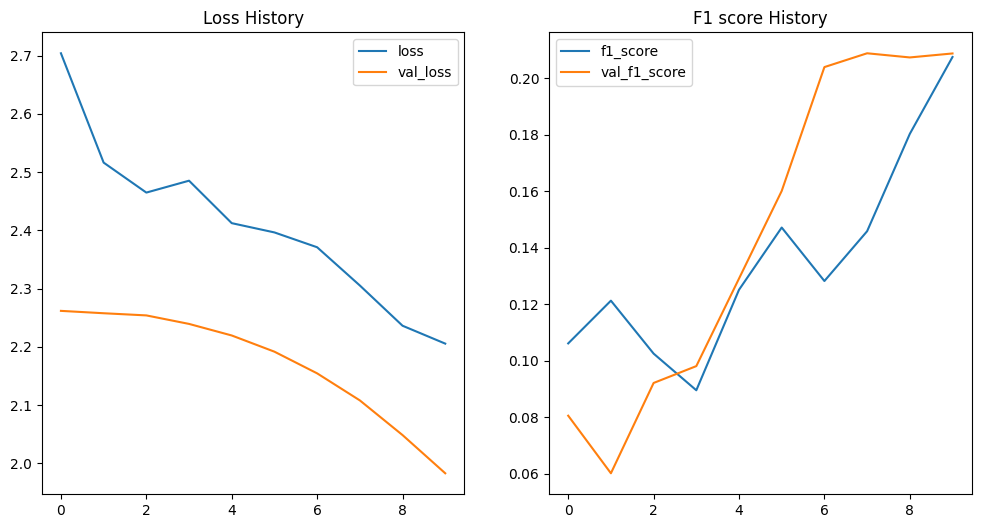

In [57]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss History')
plt.subplot(1, 2, 2)
plt.plot(history.history['f1_score'], label='f1_score')
plt.plot(history.history['val_f1_score'], label='val_f1_score')
plt.legend()
plt.title('F1 score History')
plt.show()

### Inference and Evaluating Model

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = bert_tf.predict(X_test_padded)

38/38 [==============================] - 14s 357ms/step


In [61]:
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test.values, axis=1)
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.35      0.32      0.34       142
           2       0.00      0.00      0.00        71
           3       0.38      0.14      0.20       131
           4       0.30      0.36      0.33       137
           5       0.34      0.85      0.49       162
           6       0.62      0.34      0.44       114
           7       0.71      0.04      0.08       116
           8       0.33      0.83      0.47       150
           9       1.00      0.01      0.02        90

    accuracy                           0.35      1200
   macro avg       0.40      0.29      0.24      1200
weighted avg       0.41      0.35      0.27      1200



/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


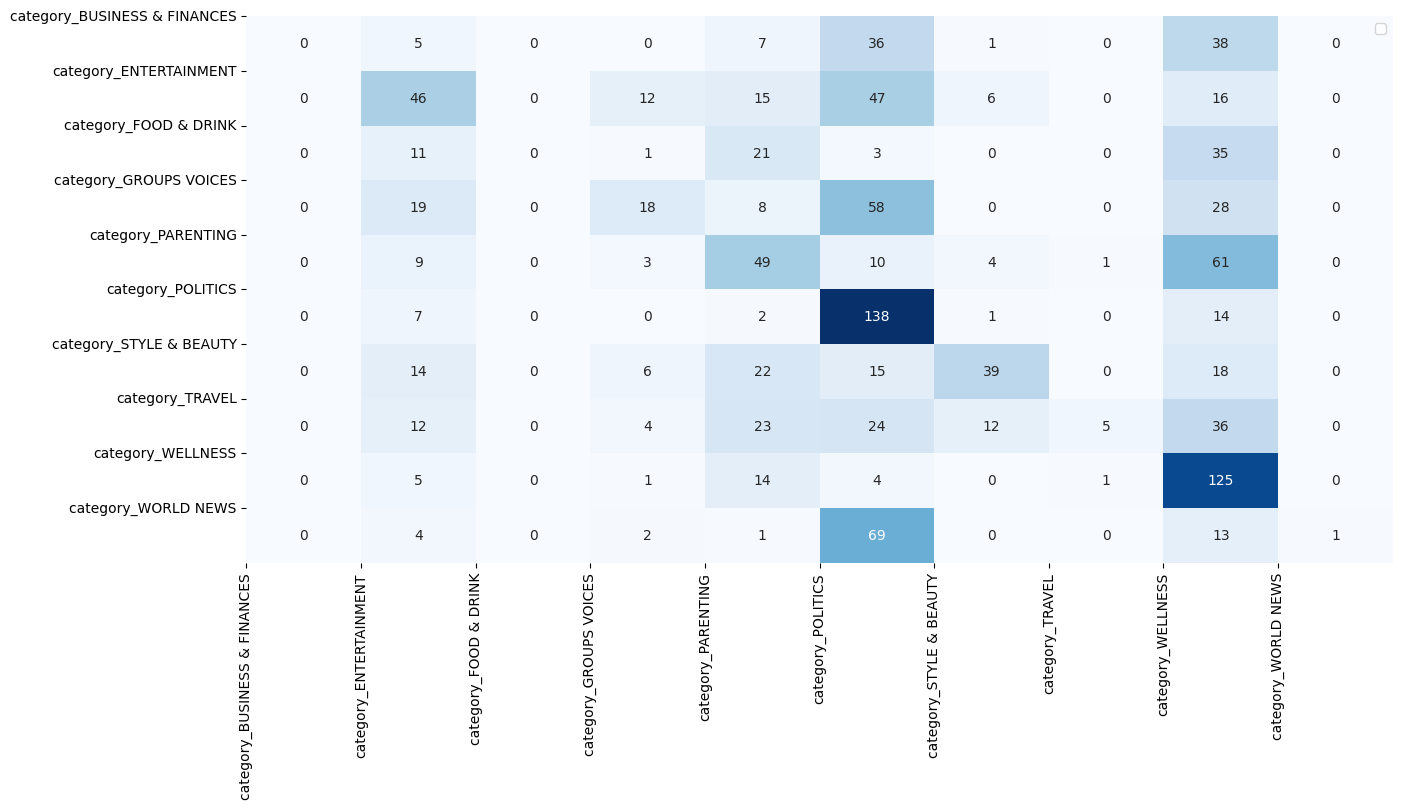

In [62]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.tight_layout()
plt.xticks(range(10), class_names, rotation=90)
plt.yticks(range(10), class_names, rotation=0)
plt.legend()

### Train LogisticModel

### TfidfVectorizer

In [4]:
# load the data
X = load_data('X_3k.h5')
y = load_data('y_3k.h5')
print(f'X shape: {X.shape} \n y shape: {y.shape}')

X shape: (3000,) 
 y shape: (3000,)


In [5]:
# transform the categories to numbers by sklearn LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


In [6]:
le = LabelEncoder()
y_label = le.fit_transform(y)

In [8]:

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.8, random_state=42)
# TF-IDF Embedding
tfidf_vectorizer = TfidfVectorizer()
tf_vectors = tfidf_vectorizer.fit_transform(X_train)
print(f"shape of TF-IDF embedding: {tf_vectors.shape}")
X_train_vec = tf_vectors
#X_val_vec = tfidf_vectorizer.transform(X_val)
X_test_vec = tfidf_vectorizer.transform(X_test)
lgr = LogisticRegression()
lgr.fit(X_train_vec, y_train)
y_pred = lgr.predict(X_test_vec) # predict on the test set
metrics.accuracy_score(y_test, y_pred)

shape of TF-IDF embedding: (600, 4721)


0.43291666666666667

In [196]:
class_names = le.classes_.tolist()

In [197]:
def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.tight_layout()
    plt.xticks(range(10), class_names, rotation=90)
    plt.yticks(range(10), class_names, rotation=0)
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


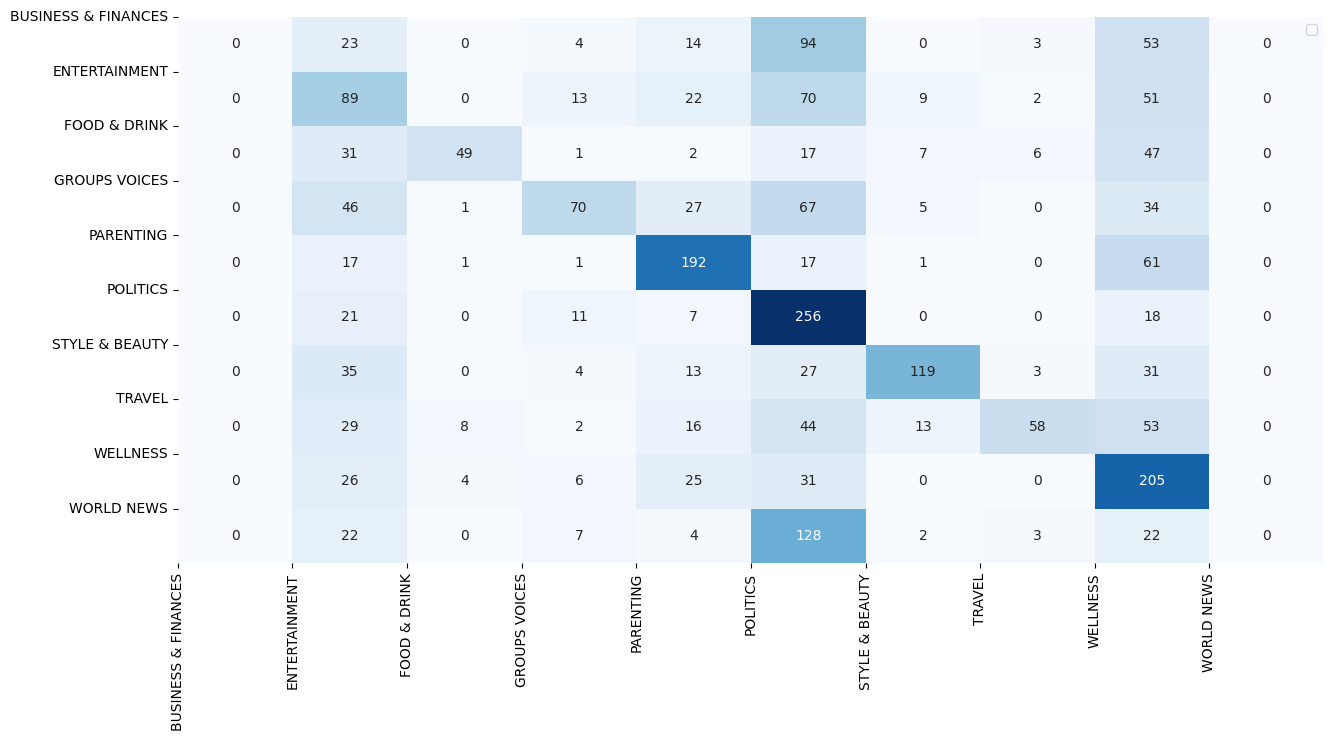

In [198]:
# plot the confusion matrix
import seaborn as sns
plot_confusion_matrix(y_test, y_pred)

##### try parameters
Apparently, the customized tfidf vectorizer performs good.

In [199]:

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_label, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.8,  # Ignore terms that appear in more than 80% of documents
    min_df=2,    # Ignore terms that appear in fewer than 2 documents
    ngram_range=(1,2)  # Use both unigrams and bigrams
)

X_train_vec = tfidf_vectorizer.fit_transform(X_train)
X_test_vec = tfidf_vectorizer.transform(X_test)

# Logistic Regression Model
lgr = LogisticRegression(C=1.0, penalty='l2', solver='saga', max_iter=100)
lgr.fit(X_train_vec, y_train)

# Predictions on the test set
y_pred = lgr.predict(X_test_vec)

# Calculate and print accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.85375


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


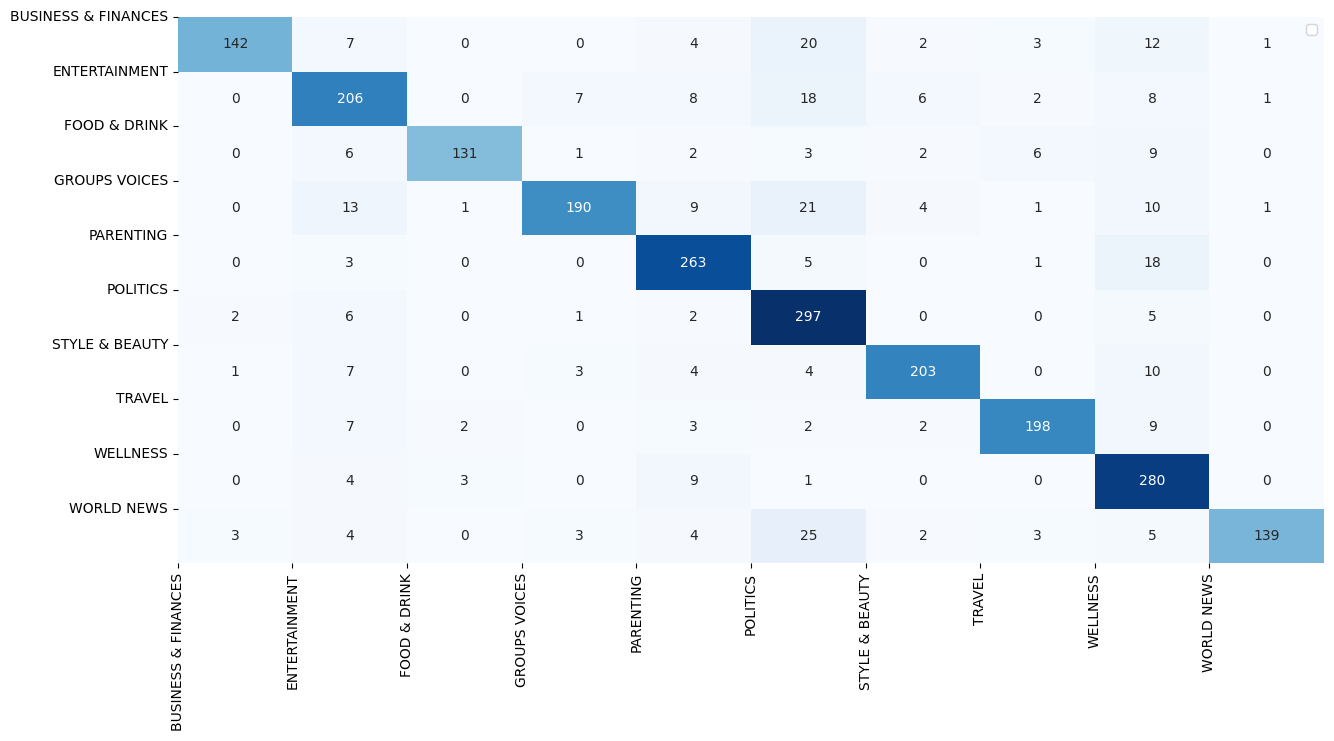

In [200]:
y_pred = lgr.predict(X_test_vec) # predict on the test set
metrics.accuracy_score(y_test, y_pred)
class_names = le.classes_.tolist()
# plot the confusion matrix
plot_confusion_matrix(y_test, y_pred)

##### K-fold CrossValidation

In [174]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# import label encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [182]:
df = pd.read_csv('news_10_category_cleaned_3k.csv')
X = df['text']
y = df['category']
y_label = LabelEncoder().fit_transform(y)

In [163]:
vectorizer = TfidfVectorizer()
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.2, random_state=42)
model = LogisticRegression(C=1.0, penalty='l2', solver='saga', max_iter=100)
kfold = skf.split(X_train, y_train)
pipl = make_pipeline(vectorizer, model)
scores = []
for k, (train, test) in enumerate(kfold):
    pipl.fit(X[train], y_label[train])
    score = pipl.score(X[test], y_label[test])
    scores.append(score)
    print(f"Fold {k+1}: {score}")
avg_score = np.mean(scores)
print(f"Average Score: {avg_score}")


Fold 1: 0.5947521865889213
Fold 2: 0.6005830903790087
Fold 3: 0.5451895043731778
Fold 4: 0.6005830903790087
Fold 5: 0.5685131195335277
Fold 6: 0.6005830903790087
Fold 7: 0.5789473684210527


shape of TF-IDF embedding: (600, 1701)


/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partiti

Best parameters set: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: nan
accuracy: 0.13041666666666665


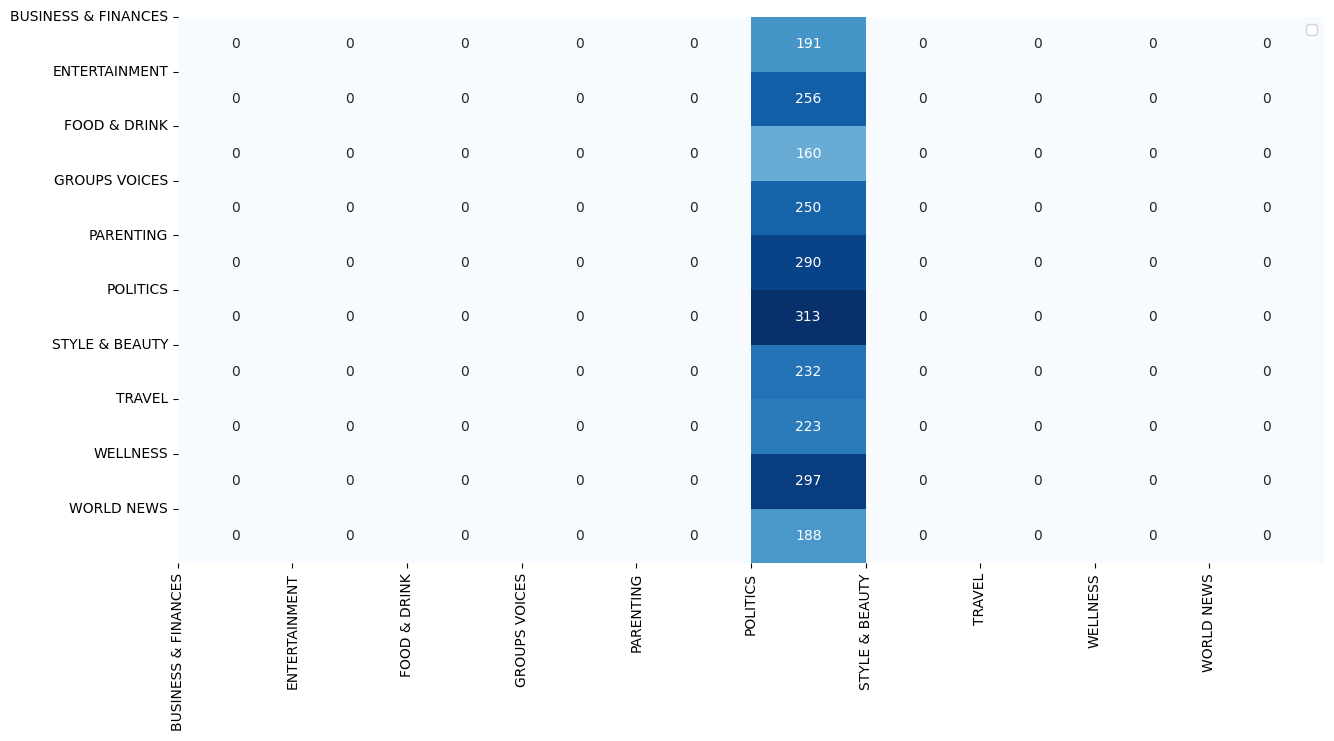

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.8, random_state=42)
# TF-IDF Embedding
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.8,  # Ignore terms that appear in more than 80% of documents
    min_df=2,    # Ignore terms that appear in fewer than 2 documents
    ngram_range=(1,2)  # Use both unigrams and bigrams
)
tf_vectors = tfidf_vectorizer.fit_transform(X_train)
print(f"shape of TF-IDF embedding: {tf_vectors.shape}")
X_train_vec = tf_vectors
X_test_vec = tfidf_vectorizer.transform(X_test)
param_lrg = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga', 'newton-cg'],
}
model = LogisticRegression()
gs_lrg = GridSearchCV(model, param_lrg, cv=5, verbose=0, scoring='roc_auc')
gs_lrg.fit(X_train_vec, y_train)
y_pred = gs_lrg.predict(X_test_vec) # predict on the test set
print("Best parameters set:", gs_lrg.best_params_)
print("Best score:", gs_lrg.best_score_)
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

In [ ]:
# Grid Search failed to try
param_log = {
    #'TfidfVectorizer__max_df': [0.7, 0.8, 0.9],  # Ignore terms that appear in more than 80% of documents
    #'TfidfVectorizer__min_df': [2, 3, 4],    # Ignore terms that appear in fewer than 2 documents，, 'lbfgs', 'sag', 'newton-cholesky'
    #'TfidfVectorizer__ngram_range':[(1,2)],
    'LogisticRegression__penalty': ['l1', 'l2'],
    'LogisticRegression__C': [0.01, 0.1, 1, 10],
    'LogisticRegression__solver': ['liblinear', 'saga', 'newton-cg']
}

grid_search = make_pipeline(TfidfVectorizer(),GridSearchCV(LogisticRegression(), param_log, cv=5, verbose=3, scoring='accuracy'))

grid_search.fit(X, y_label)
#print("Best parameters set:", grid_search.best_params_)
print(grid_search)
print("Best score:", grid_search.best_score_)

### RandomForestClassifier

In [190]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.8, random_state=42)
# TF-IDF Embedding
tfidf_vectorizer = TfidfVectorizer()
tf_vectors = tfidf_vectorizer.fit_transform(X_train)
print(f"shape of TF-IDF embedding: {tf_vectors.shape}")
X_train_vec = tf_vectors
X_test_vec = tfidf_vectorizer.transform(X_test)
model = RandomForestClassifier()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec) # predict on the test set
metrics.accuracy_score(y_test, y_pred)

shape of TF-IDF embedding: (600, 4729)


0.41375

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


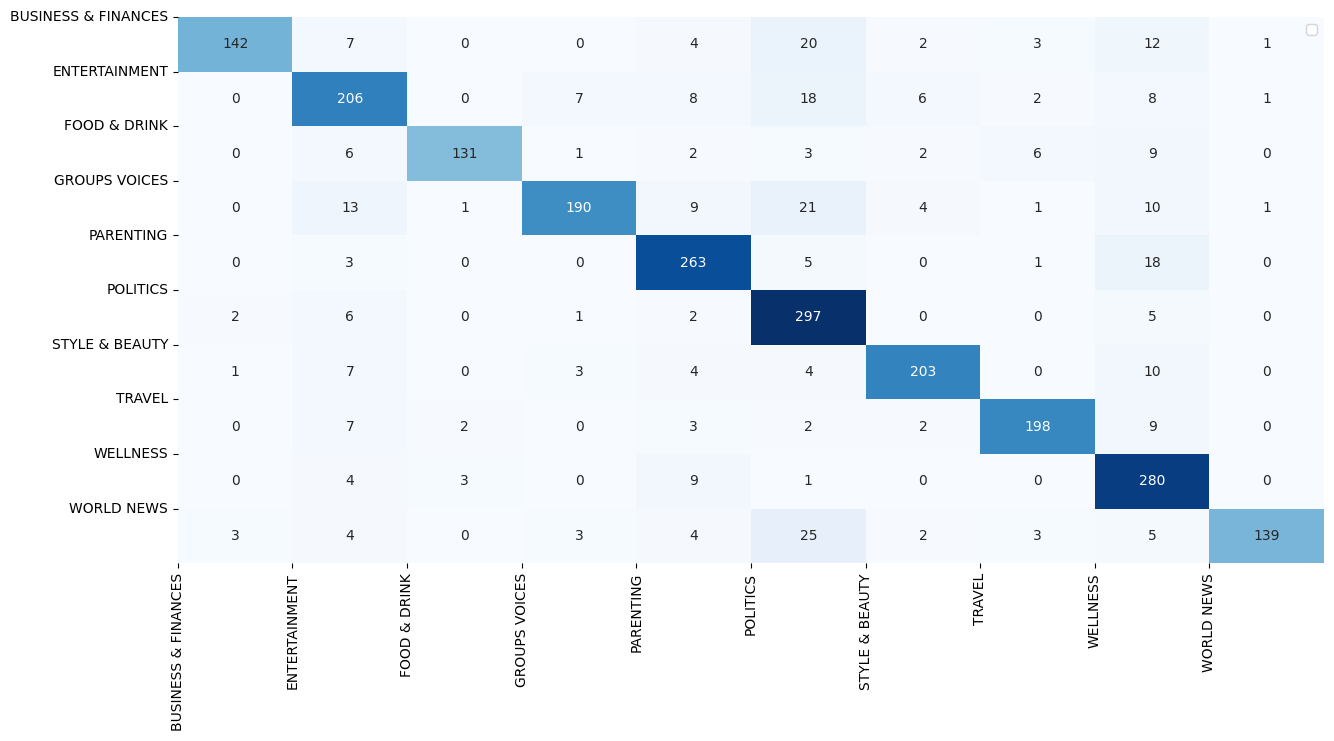

In [201]:
plot_confusion_matrix(y_test, y_pred)

shape of TF-IDF embedding: (600, 1520)


/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatc

Best parameters set: {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best score: 0.3366666666666667
accuracy: 0.3883333333333333


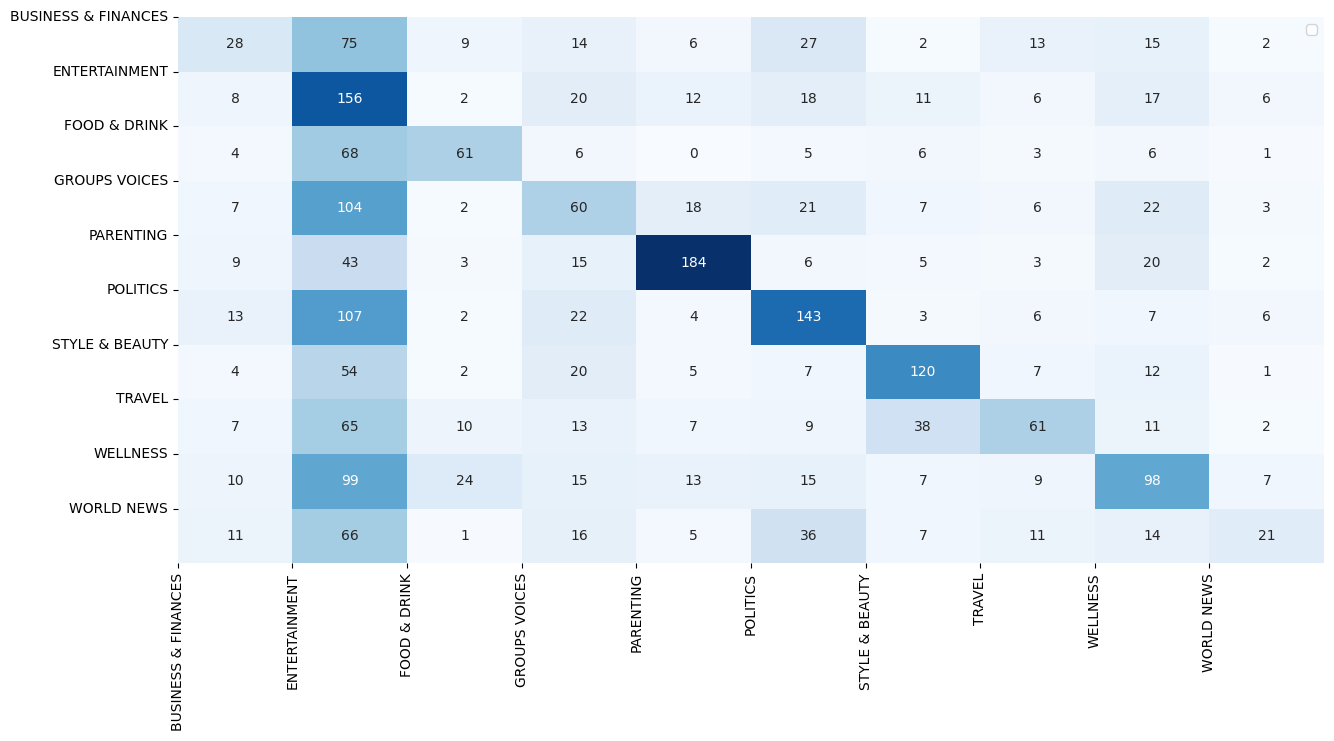

In [212]:
# with parameters
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.8, random_state=42)
# TF-IDF Embedding
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.8,  # Ignore terms that appear in more than 80% of documents
    min_df=2,    # Ignore terms that appear in fewer than 2 documents
    ngram_range=(1,1)  # Use both unigrams and bigrams
)
tf_vectors = tfidf_vectorizer.fit_transform(X_train)
print(f"shape of TF-IDF embedding: {tf_vectors.shape}")
X_train_vec = tf_vectors
X_test_vec = tfidf_vectorizer.transform(X_test)
param_rfc = {
    'n_estimators': [10, 110, 10],  # the number of trees in the forest
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': range(2, 10, 2),
    'min_samples_leaf': range(1, 10, 2),
    'max_features': ['sqrt', 'log2']
}
model = RandomForestClassifier()
gs_rfc = GridSearchCV(model, param_rfc, cv=5, verbose=0, scoring='accuracy')
gs_rfc.fit(X_train_vec, y_train)
y_pred = gs_rfc.predict(X_test_vec) # predict on the test set
print("Best parameters set:", gs_rfc.best_params_)
print("Best score:", gs_rfc.best_score_)
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Best parameters set: {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: nan
accuracy: 0.4141666666666667


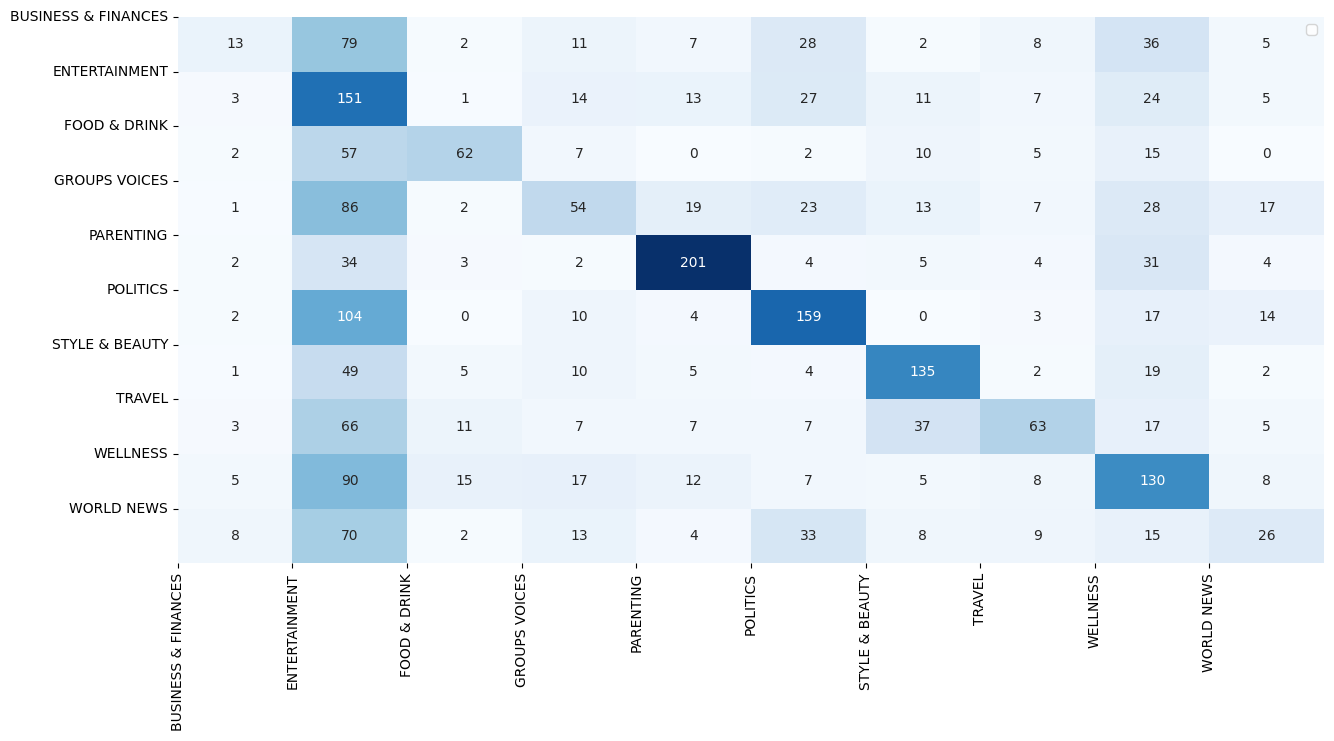

In [209]:
print("Best parameters set:", gs_rfc.best_params_)
print("Best score:", gs_rfc.best_score_)
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

### SVM

In [213]:
from sklearn.svm import LinearSVC

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


shape of TF-IDF embedding: (600, 4729)
accuracy: 0.4920833333333333


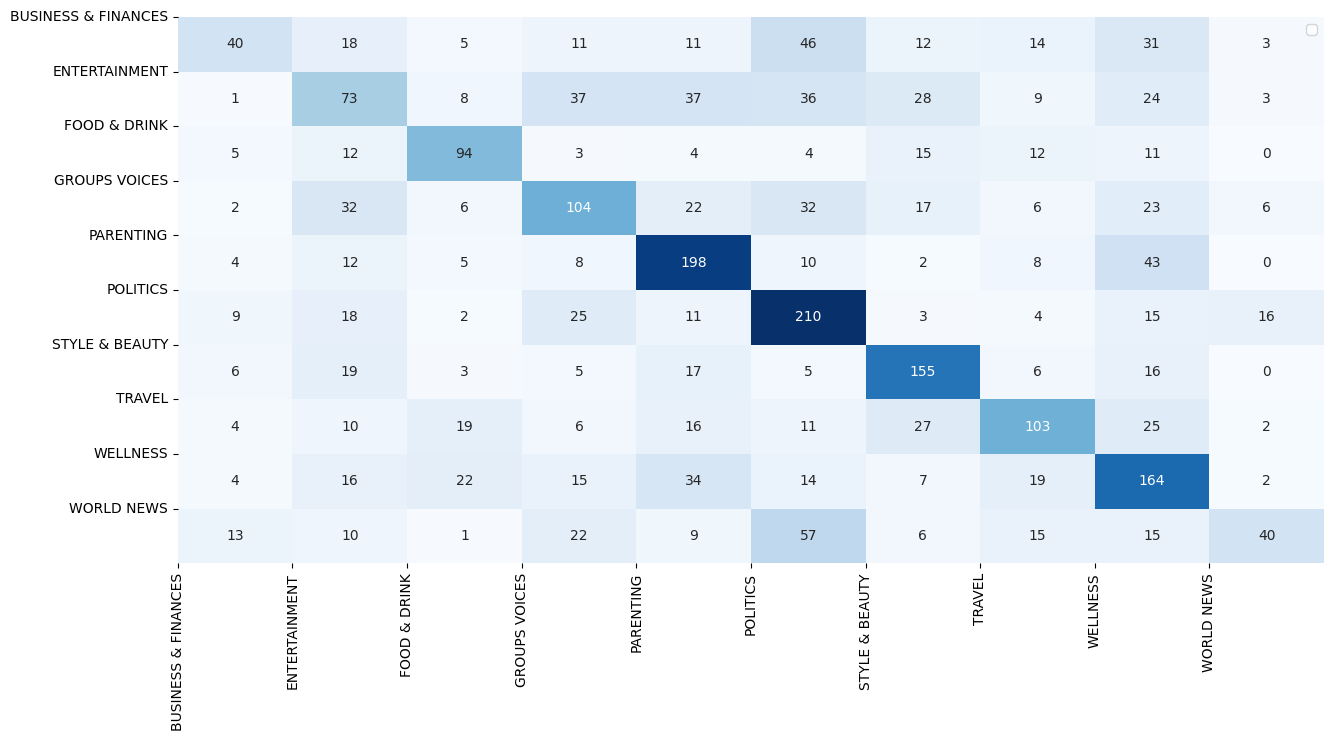

In [215]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.8, random_state=42)
# TF-IDF Embedding
tfidf_vectorizer = TfidfVectorizer()
tf_vectors = tfidf_vectorizer.fit_transform(X_train)
print(f"shape of TF-IDF embedding: {tf_vectors.shape}")
X_train_vec = tf_vectors
X_test_vec = tfidf_vectorizer.transform(X_test)
model = LinearSVC()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec) # predict on the test set
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/sit

Best parameters set: {'C': 1, 'multi_class': 'crammer_singer'}
Best score: 0.47833333333333333
accuracy: 0.48


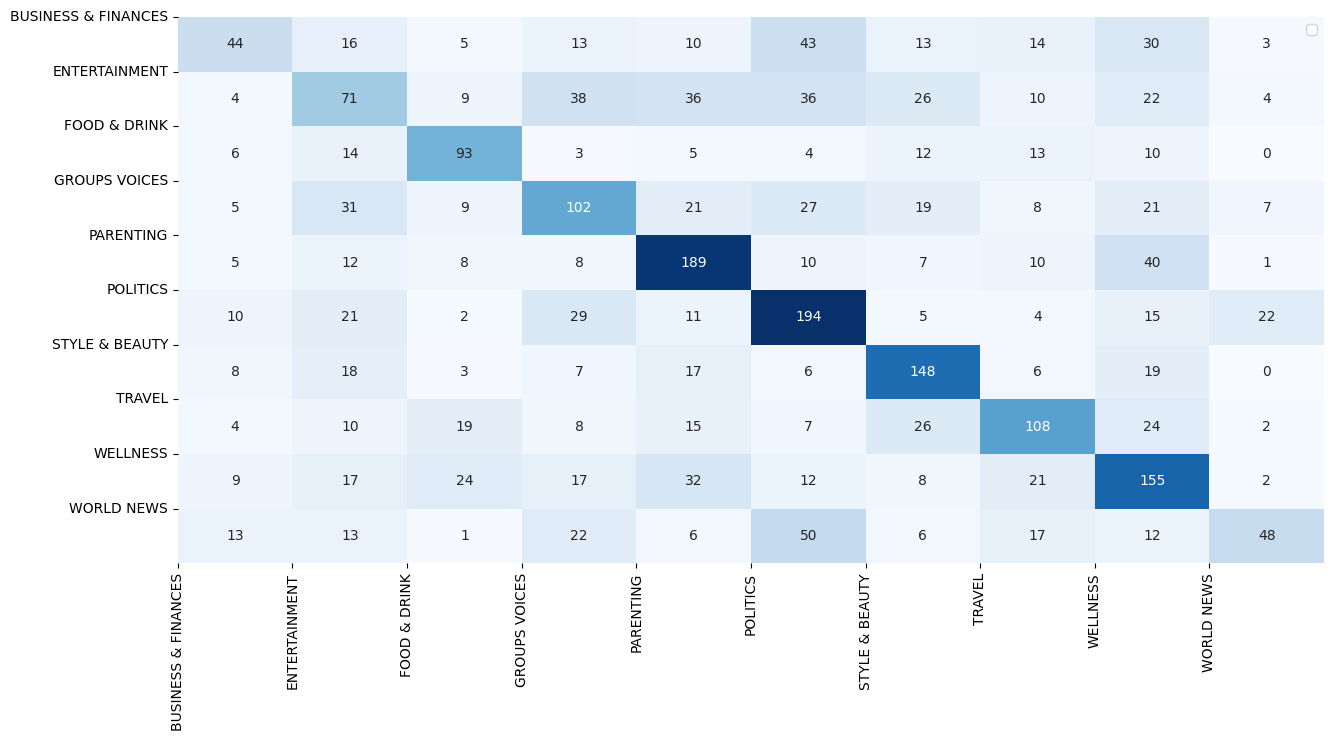

In [225]:
param_rfc = {
    'C': [0.01, 0.1, 1, 10],
    'multi_class': ['ovr', 'crammer_singer']
}
model = LinearSVC()
gs_rfc = GridSearchCV(model, param_rfc, cv=5, verbose=0, scoring='accuracy')
gs_rfc.fit(X_train_vec, y_train)
y_pred = gs_rfc.predict(X_test_vec) # predict on the test set
print("Best parameters set:", gs_rfc.best_params_)
print("Best score:", gs_rfc.best_score_)
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

### RidgeClassifier

In [216]:
from sklearn.linear_model import RidgeClassifier

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


accuracy: 0.49666666666666665


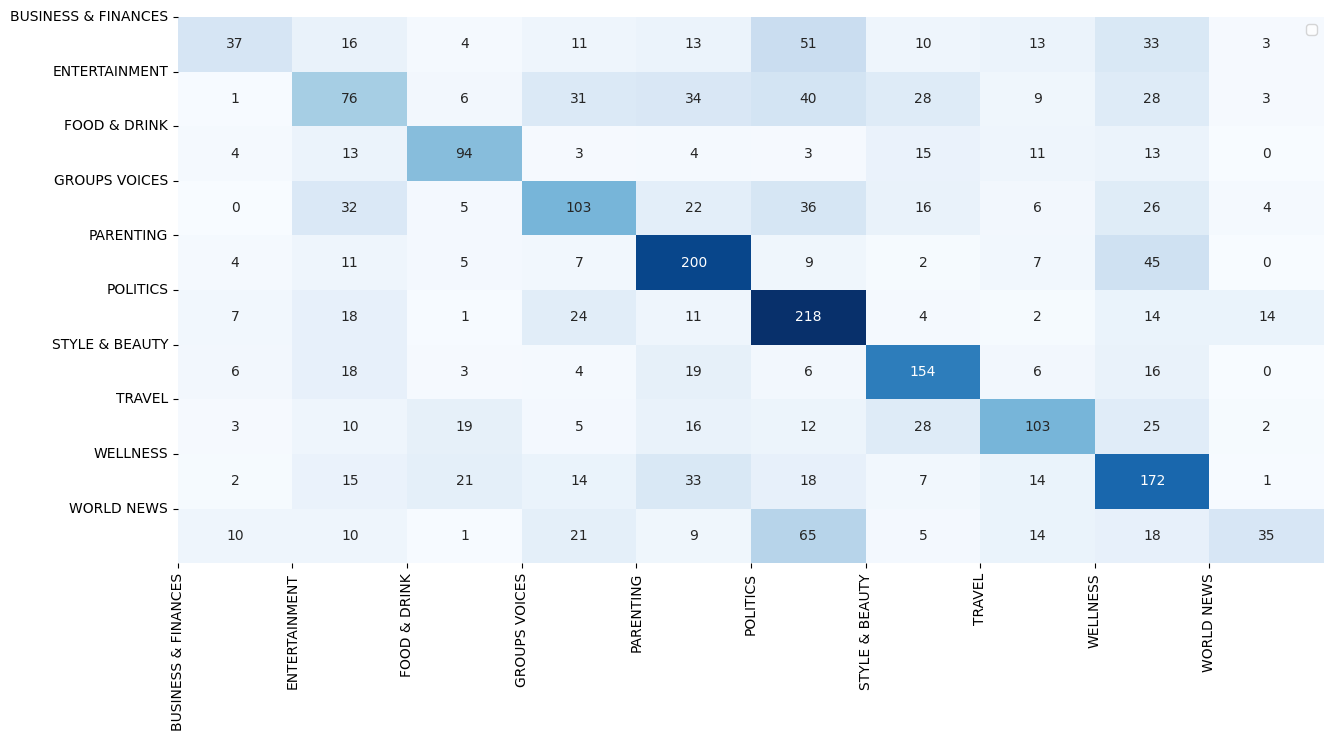

In [217]:
model = RidgeClassifier()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec) # predict on the test set
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

### MultinomialNB

In [59]:
# import multinomialNB
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
# import label encoder
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [63]:
model = MultinomialNB()
#model = CategoricalNB()

In [17]:
df = pd.read_csv('news_10_category_cleaned_3k.csv')
X = df['text']
y = df['category']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [53]:
vectorizer = TfidfVectorizer(
    max_df=0.8,  # Ignore terms that appear in more than 80% of documents
    min_df=2,    # Ignore terms that appear in fewer than 2 documents
    ngram_range=(1,2)  # Use both unigrams and bigrams
)
vectorizer.fit(X_train)
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [26]:
le = LabelEncoder()
y_train_label = le.fit_transform(y_train)
y_test_label = le.transform(y_test)

In [66]:
# import one hot encoder
from sklearn.preprocessing import OneHotEncoder
# instantiate one hot encoder
ohe = OneHotEncoder(sparse=False)
# reshape the label array
y_train_ohe = ohe.fit_transform(y_train.T.values.reshape(-1, 1))
y_test_ohe = ohe.transform(y_test.T.values.reshape(-1, 1))

In [37]:
dic_vocabulary = vectorizer.vocabulary_
len(dic_vocabulary)

10000

In [40]:
dic_vocabulary['right way']

4888

In [51]:
# import pipeline
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
pipl = Pipeline([('vectorizer', vectorizer), ('model', model)]) 
pipl['model'].fit(X_train_vec, y_train_label)
y_pred = pipl['model'].predict(X_test_vec)
predicted_prob = model.predict_proba(X_test_vec)

Accuracy: 0.42
Auc: 0.83
Detail:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       191
           1       0.33      0.29      0.31       256
           2       0.80      0.24      0.37       160
           3       0.57      0.24      0.34       250
           4       0.49      0.68      0.57       290
           5       0.34      0.82      0.48       313
           6       0.71      0.50      0.59       232
           7       0.79      0.26      0.39       223
           8       0.33      0.68      0.44       297
           9       1.00      0.01      0.01       188

    accuracy                           0.42      2400
   macro avg       0.53      0.37      0.35      2400
weighted avg       0.51      0.42      0.37      2400



/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


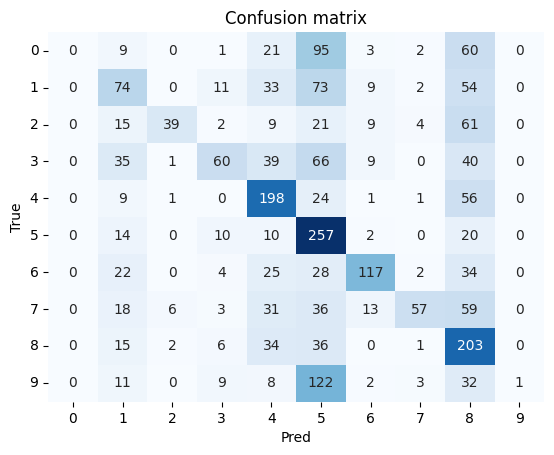

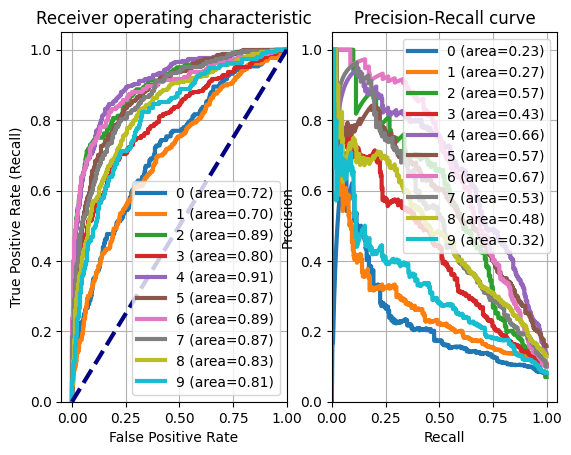

In [65]:
from  sklearn import metrics 
classes = np.unique(y_test_label)
y_test_array = pd.get_dummies(y_test_label, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test_label, y_pred)
auc = metrics.roc_auc_score(y_test_label, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test_label, y_pred))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test_label, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

### XGBClassifier

In [220]:
from xgboost.sklearn import XGBClassifier

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


accuracy: 0.35875


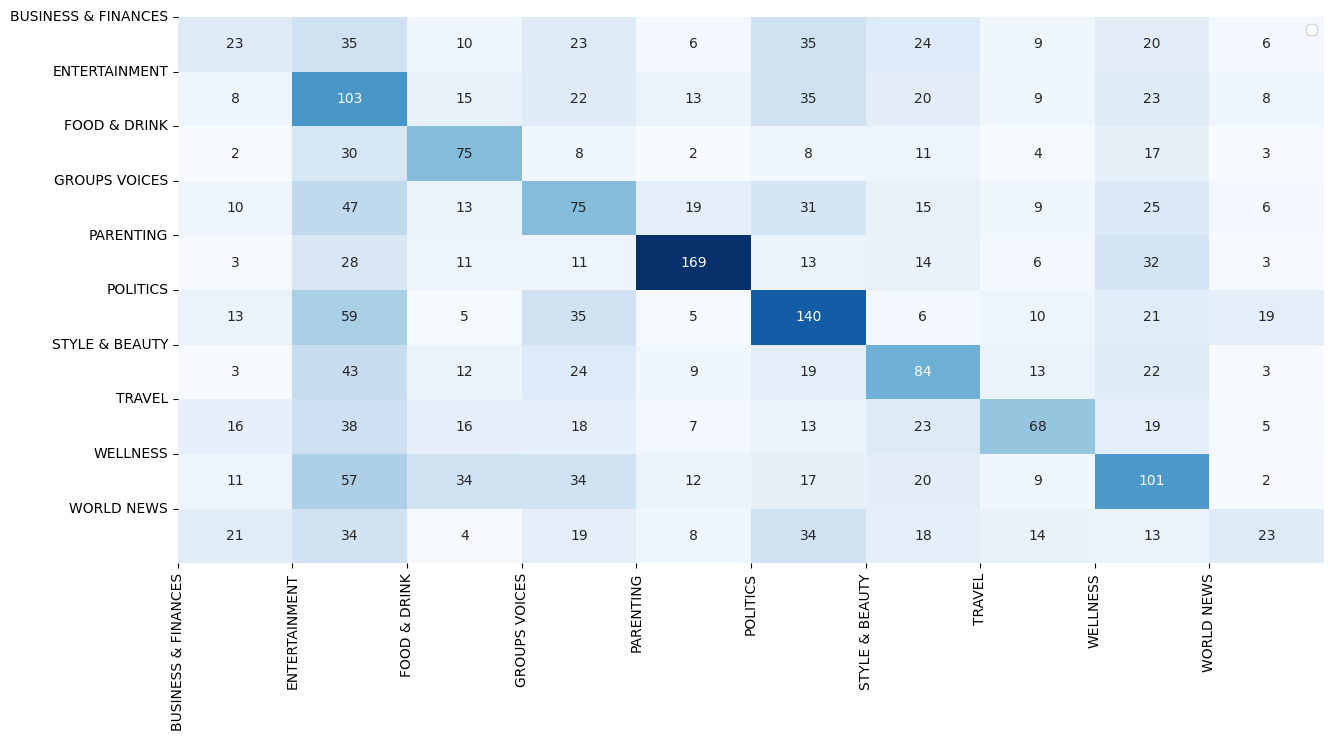

In [221]:
model = XGBClassifier(objective = 'multi:softprob')
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec) # predict on the test set
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

### LSTM (RNN)

In [10]:
from torchtext import data
import torch

In [11]:
import torch
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):
        
        super().__init__()
                
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        self.lstm_head = nn.LSTM(embedding_dim, hidden_dim, num_layers = n_layers, bidirectional = bidirectional, dropout = dropout)
        
        #self.lstm_desc = nn.LSTM(embedding_dim, hidden_dim, num_layers = n_layers, bidirectional = bidirectional, dropout = dropout)
        
        self.fc_head = nn.Linear(hidden_dim * 2, 100)
        
        #self.fc_desc = nn.Linear(hidden_dim * 2, 100)
        
        self.fc_total = nn.Linear(100, output_dim)
        
        self.dropout = nn.Dropout(dropout)
                
    def forward(self, x):
                        
        embedded_head = self.dropout(self.embedding(x))
        
        #embedded_desc = self.dropout(self.embedding(description))
                                    
        output_head, (hidden_head, cell_head) = self.lstm_head(embedded_head)
        
        #output_desc, (hidden_desc, cell_desc) = self.lstm_desc(embedded_desc)
        
        hidden_head = self.dropout(torch.cat((hidden_head[-2, :, :], hidden_head[-1, :, :]), dim = 1))
        
        #hidden_desc = self.dropout(torch.cat((hidden_desc[-2, :, :], hidden_desc[-1, :, :]), dim = 1))
        
        full_head = self.fc_head(hidden_head)
        
        #full_desc = self.fc_desc(hidden_desc)
        
        hiddens = full_head
        
        return self.fc_total(hiddens)

In [12]:
X_train_vec.shape

(600, 4721)

In [ ]:
# commbine the X_train_vec and y_train into a numpy array
X_train_vec = X_train_vec.toarray()
X_test_vec = X_test_vec.toarray()
X_train_vec.shape, X_test_vec.shape
trainset = np.concatenate((X_train_vec, y_train.reshape(-1, 1)), axis=1)


In [13]:
INPUT_DIM = X_train_vec.shape[1]
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTOUT_DIM = 10
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.5

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTOUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT)

In [14]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters())
metric = nn.CrossEntropyLoss()

In [19]:
# use batch iteratior 
from torch.utils.data import TensorDataset, DataLoader
trainset = torch.utils.data.TensorDataset(torch.from_numpy(X_train_vec.toarray()).long(), torch.from_numpy(y_train).long())
#valset = torch.utils.data.TensorDataset(torch.from_numpy(X_val_vec.toarray()).long(), torch.from_numpy(y_val).long())
testset = torch.utils.data.TensorDataset(torch.from_numpy(X_test_vec[:200].toarray()).long(), torch.from_numpy(y_test[:200]).long())
trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
#valloader = DataLoader(valset, batch_size=128, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=True)

In [16]:
def train(model, trainloader, optimizer, metric):
    epoch_loss = 0
    epoch_acc = 0
    model.train()
    for x, y in trainloader:
        optimizer.zero_grad()
        y_pred = model(x)
        loss = metric(y_pred, y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += (y_pred.argmax(1) == y).sum().item()
    return epoch_loss / len(trainloader), epoch_acc / len(trainloader)
def evaluate(model, valloader, metric):
    epoch_loss = 0
    epoch_acc = 0
    model.eval()
    with torch.no_grad():
        for x, y in valloader:
            y_pred = model(x)
            print(y_pred.shape)
            print(y.shape)
            loss = metric(y_pred, y)
            epoch_loss += loss.item()
            epoch_acc += (y_pred.argmax(1) == y).sum().item()
    return epoch_loss / len(valloader), epoch_acc / len(valloader)

In [20]:
EPOCHS = 5
best_valid_loss = float('inf')
for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, trainloader, optimizer, metric)
    valid_loss, valid_acc = evaluate(model, testloader, metric)
    
    print(f'Epoch: {epoch+1:02}')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

: 